In [1]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn import metrics
import warnings

In [4]:
# Logistic Regression Model

xData = np.array([0.3, 0.4, 0.5, 0.6, 0.65, 0.67, 0.8])
yData = np.array([-936.0, -892.0, -178.33, -50.7, -65.7, -70.44, -9.0])


def func(x, a, b, c):
    return a / (1.0 + np.power(x/b, c))

initialParameters = np.array([1.0, 1.0, 1.0])

warnings.filterwarnings("ignore")
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = np.square(absError)
MSE = np.mean(SE)
RMSE = np.sqrt(MSE)
Rsquared = 1.0 - (np.var(absError) / np.var(yData))

print('Parameters:', fittedParameters)
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

Parameters: [-9.44190121e+02  4.62871516e-01  1.82510547e+01]
RMSE: 39.570192812136575
R-squared: 0.9937474660527057


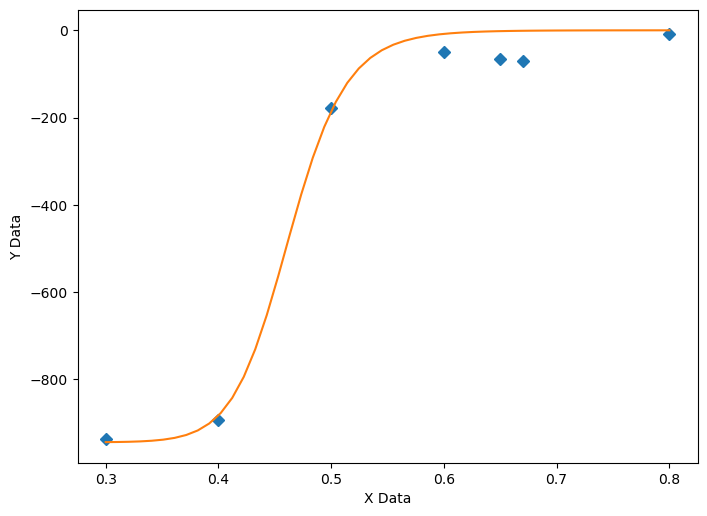

In [7]:
def LogisticModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)
    axes.plot(xData, yData,  'D')

    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data')
    axes.set_ylabel('Y Data')

    plt.show()
    plt.close('all')
    

graphWidth = 800
graphHeight = 600

LogisticModelAndScatterPlot(graphWidth, graphHeight)

In [56]:
# Polynomial Regression Model

xPolyData = np.array([0.0, 0.3, 0.4, 0.5, 0.67, 0.8])
yPolyData = np.array([0.0, 0.8, 1.0, 1.2, 1.5, 1.4])


def func(x, a, b, c):
    return a * x + b * x**2 + c

initialParameters = np.array([1.0, 1.0, 1.0])

warnings.filterwarnings("ignore")
fittedParameters, pcov = curve_fit(func, xPolyData, yPolyData, initialParameters)

modelPredictions = func(xPolyData, *fittedParameters) 

absError = modelPredictions - yPolyData

SE = np.square(absError)
MSE = np.mean(SE)
RMSE = np.sqrt(MSE)
Rsquared = 1.0 - (np.var(absError) / np.var(yData))

print('Parameters:', fittedParameters)
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

Parameters: [ 3.3971416  -1.93316651 -0.01645997]
RMSE: 0.054759721138505746
R-squared: 0.9838436042070748


y = 3.39714 * x + -1.93317 * x^2 + -0.01646


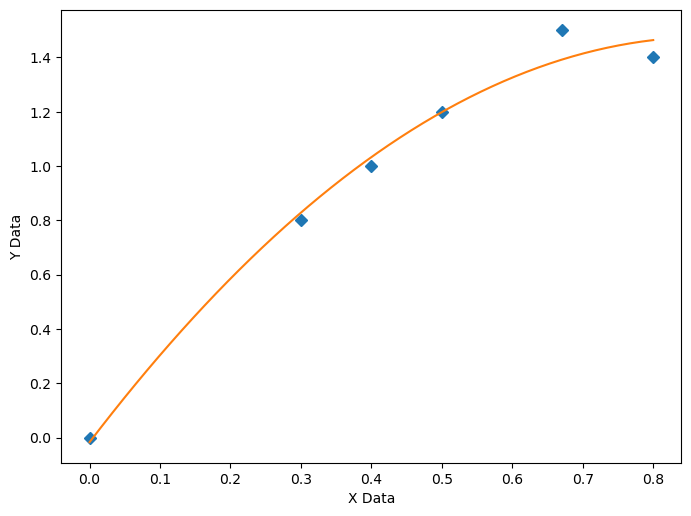

In [57]:
def PolyModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)
    axes.plot(xPolyData, yPolyData,  'D')

    xPolyModel = np.linspace(min(xPolyData), max(xPolyData))
    yPolyModel = func(xPolyModel, *fittedParameters)
    
    a, b, c = fittedParameters
    print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

    axes.plot(xPolyModel, yPolyModel)

    axes.set_xlabel('X Data')
    axes.set_ylabel('Y Data')

    plt.show()
    plt.close('all')
    

graphWidth = 800
graphHeight = 600

PolyModelAndScatterPlot(graphWidth, graphHeight)

In [58]:
def f(x):
    return(3.39714 * x + -1.93317 * x**2 + -0.01646)

N = 1000
x1 = 0
x2 = 0.8
dx = (x2 - x1)/N
A = 0
x = x1

while x <= x2:
    dA = f(x)*dx
    A = A + dA
    x = x + dx
    
print("AUC = ", A)

AUC =  0.743396761756164


In [59]:
# Target Func

xData = np.array([0.0, 0.2, 0.4, 0.5, 0.6])
yData = np.array([0.0, 0.4, 0.8, 1.0, 1.2])


def func(x, a, b, c):
    return a * x + b * x**2 + c

initialParameters = np.array([1.0, 1.0, 1.0])

warnings.filterwarnings("ignore")
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = np.square(absError)
MSE = np.mean(SE)
RMSE = np.sqrt(MSE)
Rsquared = 1.0 - (np.var(absError) / np.var(yData))

print('Parameters:', fittedParameters)
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

Parameters: [1.99999998e+00 2.71270148e-08 2.01508877e-09]
RMSE: 1.1519345994767758e-09
R-squared: 1.0


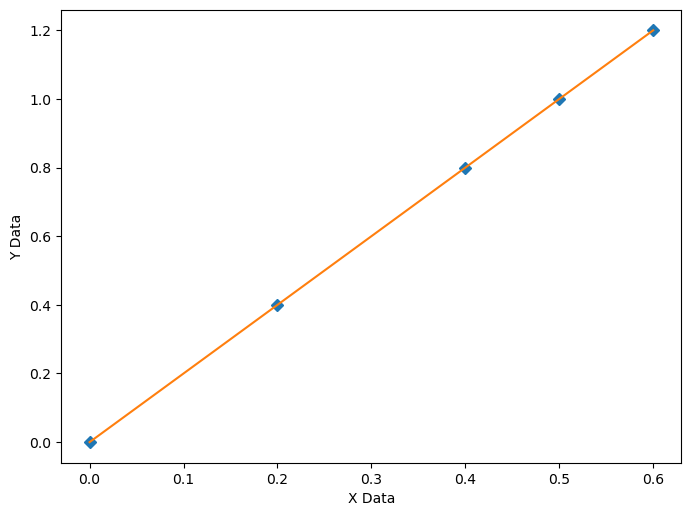

In [60]:
def TargetModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)
    axes.plot(xData, yData,  'D')

    xModel = np.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    axes.plot(xModel, yModel)
    axes.set_xlabel('X Data')
    axes.set_ylabel('Y Data')

    plt.show()
    plt.close('all')
    

graphWidth = 800
graphHeight = 600

TargetModelAndScatterPlot(graphWidth, graphHeight)

In [61]:
a, b, c = fittedParameters
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 2.00000 * x + 0.00000 * x^2 + 0.00000


In [62]:
def f(x):
    return(2.0 * x + 0.0 * x**2 + 0.0)

N=1000
x1=0.0
x2=0.6
dx = (x2 - x1)/N
A=0
x=x1

while x <= x2:
    dA = f(x)*dx
    A = A + dA
    x = x + dx
    
print("A = ", A)

A =  0.35963999999999746
